In [ ]:
### 신경망 구현
## 1. 초기화 (입력/은닉/출력 노드 수, 학습률 설정)
## 2. 학습 (W 업데이트)
## 3. 질의 (입력->연산->출력 노드에 전달)

In [72]:
import numpy as np
import scipy.special

class neuralnetwork:
    
    ## 1. 신경망 초기화
    def  __init__(self,input_nodes,hidden_nodes,output_nodes,learning_rate):
        # 입력/은닉/출력node,  학습율
        self.inodes=input_nodes
        self.hnodes=hidden_nodes
        self.onodes=output_nodes
        self.lr=learning_rate
        
        # 가중치 W -> 행렬
        # 입력~은닉 W = (은닉n * 입력n)
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        # 은닉~출력 W = (출력n * 은닉n)
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.active_func=lambda x:scipy.special.expit(x)
        pass
    
    ## 2. 신경망 학습
    # 1) forward propagation ; 입력 데이터 계산 (query) -> 예측값 구하기
    # 2) back propagation : 예측값과 실제값의 차이 계산 - > W  업데이트 
    def train(self,inputs_list,targets_list):
        # inputs_list/targets_list를 2차원 행렬로 변환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        # 1) forward propagation ; 입력 데이터 계산 (query) -> 예측값 구하기
        # 은닉node로 들어오는 신호 계산
        hidden_inputs=np.dot(self.wih,inputs)
        # 은닉node에서 나가는 신호 계산
        hidden_outputs=self.active_func(hidden_inputs)
        # 출력node로 들어오는 신호 계산
        final_inputs=np.dot(self.who, hidden_outputs)
        # 출력node에서 나가는 신호 계산
        final_outputs=self.active_func(final_inputs)
        
        
        # error = 실제값-예측값
        output_errors=targets-final_outputs
        
        # 은닉node에 대한 역전파 오차 - w에 의해  나뉜  출력node의 error를 재조합하여 계산
        hidden_errors=np.dot(self.who.T,output_errors)
        # 은닉node~출력node 간의 w 업데이트 - output_errors 이용
        self.who+=self.lr * np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
        # 입력node~은닉node 간의 w 업데이트 - hidden_errors 이용
        self.wih+=self.lr * np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
        
        pass
    
    ## 3. 신경망 질의 - 입력~출력 실행
    def query(self,inputs_list):
        # inputs_list를 2차원 행렬로 변환
        inputs=np.array(inputs_list,ndmin=2).T
        # 은닉node로 들어오는 신호 계산
        hidden_inputs=np.dot(self.wih,inputs)
        # 은닉node에서 나가는 신호 계산
        hidden_outputs=self.active_func(hidden_inputs)
        # 출력node로 들어오는 신호 계산
        final_inputs=np.dot(self.who, hidden_outputs)
        # 출력node에서 나가는 신호 계산
        final_outputs=self.active_func(final_inputs)
        
        return final_outputs

In [9]:
# 입력, 은닉, 출력 노드 수 설정
input_nodes=3
hidden_nodes=3
output_nodes=3

# 학습률 정의 (0.1~0.001)
learning_rate=0.3

# 신경망 객체 생성
n=neuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

array([[0.43838053],
       [0.45800916],
       [0.38649392]])

In [ ]:
### MNIST 

In [21]:
import numpy as  np
import matplotlib.pyplot as  plt

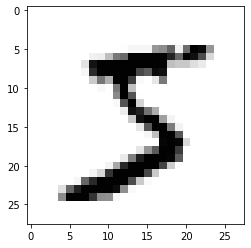

In [35]:
# train=open('C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\data\\mnist_train.csv',  'r')
# train_list=train.readlines()
# all_values=train_list[0].split(',')

# # list -> (28,28) array
# image_array=np.asfarray(all_values[1:]).reshape((28,28))
# plt.imshow(image_array,cmap='Greys',interpolation=None)

In [36]:
#  
scaled_input=(np.asfarray(all_values[1:])/255*0.99)+0.01

In [38]:
# onodes=10
# targets=np.zeros(onodes)+0.01
# targets[int(all_values[0])]=0.99
# targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [73]:
# 입력, 은닉, 출력 노드 수 설정
input_nodes=784
hidden_nodes=100
output_nodes=10 

# 학습률 정의 (0.1~0.001)
learning_rate=0.3

# 신경망 객체 생성
n=neuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [78]:
# 입력, 은닉, 출력 노드 수 설정
input_nodes=784
hidden_nodes=100
output_nodes=10 

# 학습률 정의 (0.1~0.001)
learning_rate=0.3

# 신경망 객체 생성
n=neuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

## mnist data training
train=open('C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\data\\mnist_train_100.csv',  'r')
train_list=train.readlines()
train.close()

# 신경망 training
epochs=5
for e in range(epochs):
    for record in train_list:
        train_values=record.split(',')
        # 입력node
        inputs=(np.asfarray(train_values[1:])/255*0.99)+0.01

        # 실제값
        targets=np.zeros(output_nodes)+0.01
        targets[int(train_values[0])]=0.99

        n.train(inputs,targets)

In [79]:
## mnist data test
test=open('C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\data\\mnist_test_10.csv',  'r')
test_list=test.readlines()
test.close()

#test_values=test_list[0].split(',')
# image_array=np.asfarray(test_values[1:]).reshape((28,28))
# plt.imshow(image_array,cmap='Greys')

In [81]:
# test 결과 확인
score_card=[]
for record in test_list:
    test_values=record.split(',')
    # 실제값
    answer_label=int(test_values[0])
    #print(answer_label, ' : answer_label')

    outputs=n.query((np.asfarray(test_values[1:])/255*0.99)+0.01)
    label=np.argmax(outputs)
    #print(label, " : my network's answer")
          
    if label==answer_label:
          score_card.append(1)
    else:
          score_card.append(0)

score_card_array=np.asarray(score_card)   
print(score_card_array.sum()/score_card_array.size)   

7  : answer_label
7  : my network's answer
2  : answer_label
2  : my network's answer
1  : answer_label
1  : my network's answer
0  : answer_label
0  : my network's answer
4  : answer_label
4  : my network's answer
1  : answer_label
1  : my network's answer
4  : answer_label
9  : my network's answer
9  : answer_label
4  : my network's answer
5  : answer_label
4  : my network's answer
9  : answer_label
4  : my network's answer
0.6


In [ ]:
### 전체 mnist data

In [99]:
# 입력, 은닉, 출력 노드 수 설정
input_nodes=784
hidden_nodes=100
output_nodes=10000

# 학습률 정의 (0.1~0.001)
learning_rate=0.3

# 신경망 객체 생성
n=neuralnetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

## mnist data training
train=open('C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\data\\mnist_train.csv',  'r')
train_list=train.readlines()
train_list=train_list[1:]
train.close()

In [102]:
epochs=3
for e in range(epochs):
    for record in train_list:
        train_values=record.split(',')
        # 입력node
        inputs=(np.asfarray(train_values[1:])/255*0.99)+0.01

        # 실제값
        targets=np.zeros(output_nodes)+0.01
        targets[int(train_values[0])]=0.99

        n.train(inputs,targets)

KeyboardInterrupt: 

In [ ]:
test=open('C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\data\\mnist_test.csv',  'r')
test_list=test.readlines()
test_list=test_list[1:]
test.close()

In [92]:
score_card=[]
for record in test_list:
    test_values=record.split(',')
    # 실제값
    answer_label=int(test_values[0])
    #print(answer_label, ' : answer_label')

    outputs=n.query((np.asfarray(test_values[1:])/255*0.99)+0.01)
    label=np.argmax(outputs)
    #print(label, " : my network's answer")
          
    if label==answer_label:
          score_card.append(1)
    else:
          score_card.append(0)

score_card_array=np.asarray(score_card)   
print(score_card_array.sum()/score_card_array.size)   

0.7


In [ ]:
# import pandas as pd
# graph=pd.DataFrame({'epoch 1': , 'epoch5':0.6, 'epoch7':0.7,  'epoch10': })